In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/Divyanshu-ISM/Machine-Learning-Deep-Learning/main/Volve%20P-12_DatesCorrected.csv',
                 index_col=0, parse_dates=True)

In [5]:
df.head()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

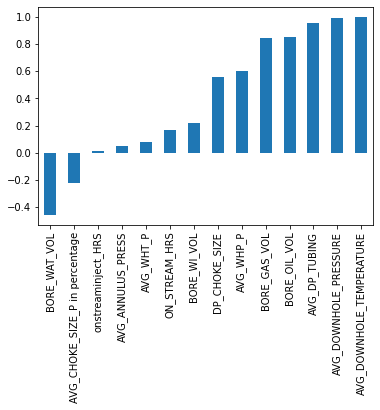

In [11]:
df.corr()['AVG_DOWNHOLE_TEMPERATURE'].sort_values().plot(kind='bar')

In [13]:
df.corr()['AVG_DOWNHOLE_TEMPERATURE'].sort_values()

BORE_WAT_VOL                     -0.456028
AVG_CHOKE_SIZE_P in percentage   -0.220456
onstreaminject_HRS                0.012351
AVG_ANNULUS_PRESS                 0.050419
AVG_WHT_P                         0.077749
ON_STREAM_HRS                     0.165454
BORE_WI_VOL                       0.221163
DP_CHOKE_SIZE                     0.556476
AVG_WHP_P                         0.600172
BORE_GAS_VOL                      0.845233
BORE_OIL_VOL                      0.850241
AVG_DP_TUBING                     0.952678
AVG_DOWNHOLE_PRESSURE             0.995501
AVG_DOWNHOLE_TEMPERATURE          1.000000
Name: AVG_DOWNHOLE_TEMPERATURE, dtype: float64

In [17]:
df = df[['BORE_WAT_VOL','DP_CHOKE_SIZE', 'AVG_WHP_P' , 'AVG_DP_TUBING' , 'BORE_OIL_VOL' , 'BORE_OIL_VOL' ,'AVG_DOWNHOLE_TEMPERATURE']]

In [18]:
df.head(2)

,BORE_WAT_VOL,DP_CHOKE_SIZE,AVG_WHP_P,AVG_DP_TUBING,BORE_OIL_VOL,BORE_OIL_VOL,AVG_DOWNHOLE_TEMPERATURE
2007-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# sns.heatmap(df.isnull())

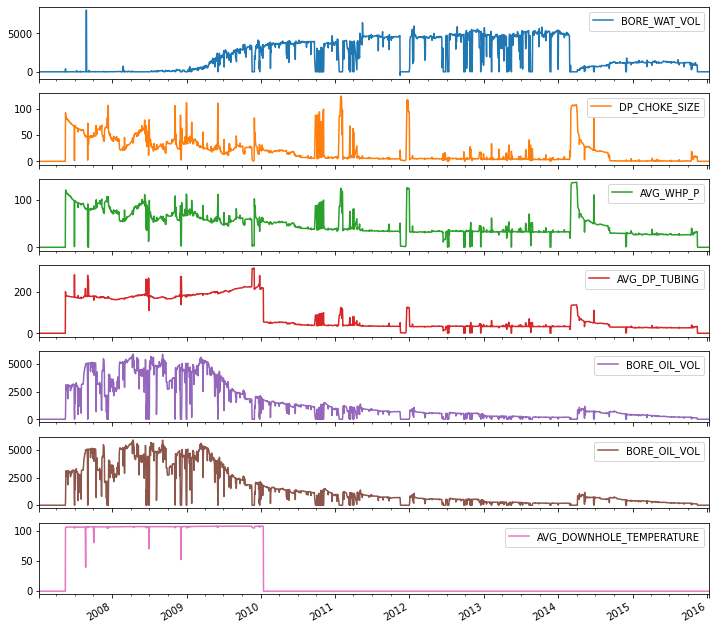

In [23]:
df.plot(figsize=(12,12) , subplots=True);

In [27]:
df = df[df.index.year <2010]

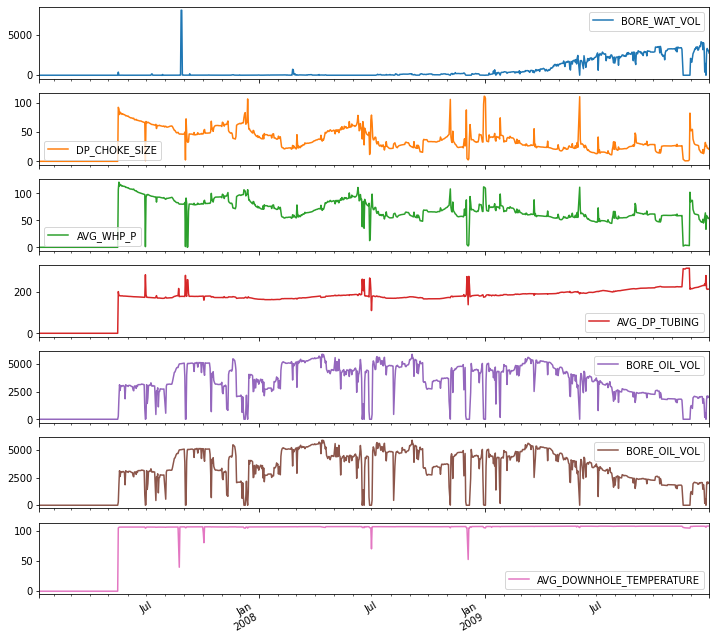

In [28]:
df.plot(figsize=(12,12) , subplots=True);

In [35]:
out = 'AVG_DOWNHOLE_TEMPERATURE'

In [48]:
df_train = df.iloc[:1000,:]
df_test = df.iloc[1000:,:]

In [52]:
X_train = df_train.drop(out, axis=1) ; y_train = df_train[out]
X_test = df_test.drop(out , axis=1) ; y_test = df_test[out]

In [53]:
y_train

2007-01-09      0.000
2007-01-10      0.000
2007-01-11      0.000
2007-01-12      0.000
2007-01-13      0.000
               ...   
2009-09-30    107.313
2009-10-01    107.312
2009-10-02    107.312
2009-10-03    107.310
2009-10-04    107.311
Name: AVG_DOWNHOLE_TEMPERATURE, Length: 1000, dtype: float64

In [54]:
X_train.shape , y_train.shape

((1000, 6), (1000,))

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
S = StandardScaler()

In [57]:
X_train_scaled = S.fit_transform(X_train) 
X_test_scaled = S.transform(X_test)

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [81]:
# model = LinearRegression()
model = RandomForestRegressor(n_estimators=200)

In [82]:
model.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [83]:
yp_train = model.predict(X_train_scaled)
yp_test = model.predict(X_test_scaled)

(732835.0, 733772.0)

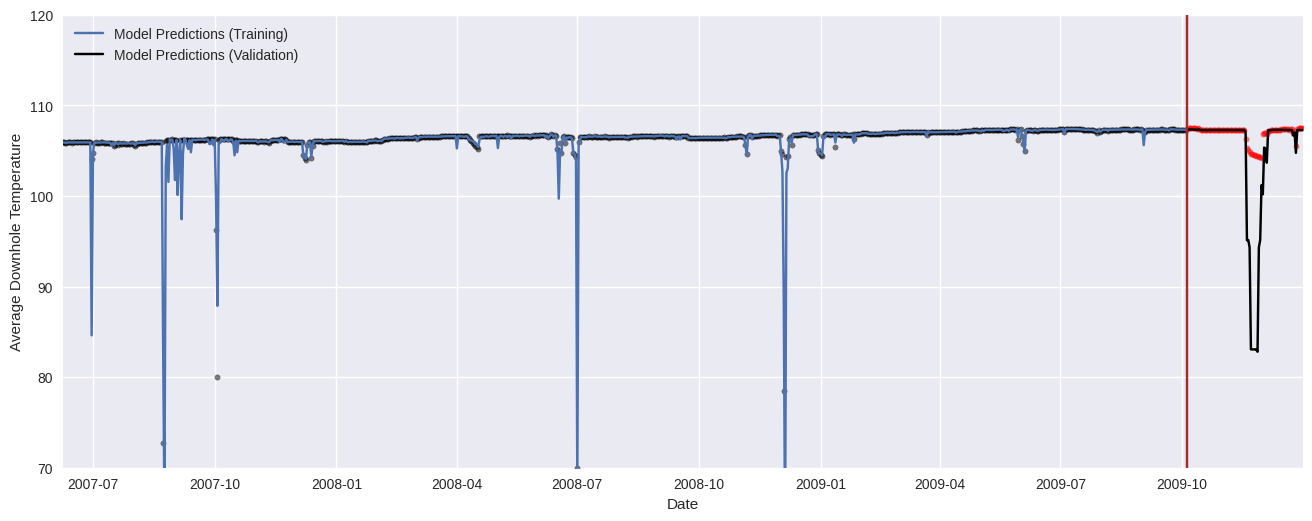

In [105]:
plt.figure(figsize=(16,6), dpi=100)
plt.style.use('seaborn')

plt.scatter(y_train.index , y_train , color='black', alpha=0.5, s=15)
plt.plot(y_train.index, yp_train , label='Model Predictions (Training)')

plt.scatter(y_test.index, y_test , color='red', alpha=0.5, s=15)
plt.plot(y_test.index, yp_test, color='black',label='Model Predictions (Validation)')

plt.axvline(y_test.index[0] , color='brown')


plt.ylabel('Average Downhole Temperature')
plt.xlabel('Date')

plt.legend()
plt.ylim(70,120)
plt.xlim(y_train.index[150] , y_test.index[-1])